In [15]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize

air = ml.Non_Dispersion(1)
OC = ml.Cauchy([1.51082517, 5.69129102e-03], 9.70850610e-04)
SiN = ml.Cauchy([1.85001015, 3.50497748e-03], 4.50757521e-04)
SiO2 = ml.Cauchy([1.48878307, 1.44759349e-03], 8.82534146e-04)
ITO = ml.Cauchy([1.68689504, 5.38710310e-02], 8.33721475e-03)
sub = ml.Cauchy([1.52990893, 1.48423855e-03])
HOC = ml.open_material('OC_HRI_LENS', 'Material')

R_scan = pd.read_csv('./spectrum/LENS/rev2/R_5_B.csv')['SCAN'].values
wl = np.linspace(400, 700, 301)

hypo_bri = lambda th: tm.Design(
    [air, SiN, SiO2, HOC, ITO, OC, ITO, SiO2, SiN, sub],
    [None, th[0], th[1], th[2]-1200, th[3], 1200, 150, th[4], th[5], None]
).reflectance(wl)

hypo_dia = lambda th: tm.Design(
    [air,  SiN, SiO2,HOC, ITO, SiO2, SiN, sub],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl)

hypo_tra = lambda th: tm.Design(
    [air,   SiN, SiO2,HOC,SiO2, SiN, sub],
    [None, th[0], th[1], th[2], th[4], th[5], None]
).reflectance(wl)


fom = lambda th: tm.RMSE(R_scan, 100*hypo_dia(th)) - 30*tm.RMSE(hypo_tra(th),hypo_dia(th))

In [16]:
sol = differential_evolution(
    fom, [
        (5,60),(4,80),(1500,2000),(20,50),(4,100),(5,80)
    ], disp=True, polish=False, popsize=15, mutation=0.3, recombination=0.9, strategy='best1bin'
)
print(sol.x)

differential_evolution step 1: f(x)= 0.656225
differential_evolution step 2: f(x)= 0.605545
differential_evolution step 3: f(x)= 0.523993
differential_evolution step 4: f(x)= 0.46154
differential_evolution step 5: f(x)= 0.0601183
differential_evolution step 6: f(x)= -0.0115412
differential_evolution step 7: f(x)= -0.0769343
differential_evolution step 8: f(x)= -0.0960271
differential_evolution step 9: f(x)= -0.0977991
differential_evolution step 10: f(x)= -0.0986321
differential_evolution step 11: f(x)= -0.0988871
differential_evolution step 12: f(x)= -0.103834
differential_evolution step 13: f(x)= -0.128282
differential_evolution step 14: f(x)= -0.153676
differential_evolution step 15: f(x)= -0.163321
differential_evolution step 16: f(x)= -0.164669
differential_evolution step 17: f(x)= -0.164812
differential_evolution step 18: f(x)= -0.165775
differential_evolution step 19: f(x)= -0.166461
differential_evolution step 20: f(x)= -0.167004
differential_evolution step 21: f(x)= -0.167254


1.6308924248187548


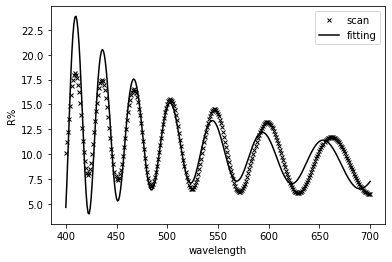

In [27]:
tk = sol.x
print(tm.RMSE(R_scan, 100*hypo_dia(tk)))
plt.plot(wl, R_scan, 'kx', label = 'scan', markersize = 4)
plt.plot(wl, 100*hypo_dia(tk), '-k', label = 'fitting')
plt.legend(loc = 'best')
plt.xlabel('wavelength')
plt.ylabel('R%')
plt.savefig('LENS_rev2_newn_scan_fitting.png')
plt.show()

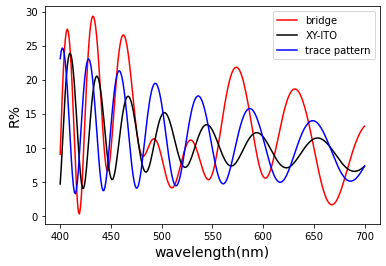

42.00134987431746
53.81105278390374
delta_dt: 4.492244984587322
delta_db: 5.755349118711711
trace 11.258333080007908
bridge: 12.311134357985882
diamond: 10.695477640670289


In [28]:
plt.plot(wl, 100*hypo_bri(tk), '-r', label = 'bridge')
plt.plot(wl, 100*hypo_dia(tk), '-k', label = 'XY-ITO')
plt.plot(wl, 100*hypo_tra(tk), '-b', label = 'trace pattern')
plt.xlabel('wavelength(nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
#plt.savefig('LENS_rev2_newn_simulation.png')
plt.show()

delta_d_t = np.mean(abs(100*(hypo_dia(tk)-hypo_tra(tk))))
delta_d_b = np.mean(abs(100*(hypo_dia(tk)-hypo_bri(tk))))
print(100*delta_d_t/np.mean(100*hypo_dia(tk)))
print(100*delta_d_b/np.mean(100*hypo_dia(tk)))
print('delta_dt:',delta_d_t)
print('delta_db:',delta_d_b)
print('trace',np.mean(100*hypo_tra(tk)))
print('bridge:',np.mean(100*hypo_bri(tk)))
print('diamond:',np.mean(100*hypo_dia(tk)))